# Stock Market Analysis for Tech Stocks

In this project, we'll analyse data from the stock market for some technology stocks.

 Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions we'll try to answer:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?
- What was the correlation between daily returns of different stocks?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behaviour?

In [2]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [3]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [4]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [53]:
file_paths = ['AAPL.csv', 'GOOGL.csv', 'MSFT.csv','AMZN.csv']  # Replace with actual file paths

# Create a dictionary to store the DataFrames
stock_data = {}

# Loop through each file and read it into a DataFrame
for stock, file_path in zip(tech_list, file_paths):
    stock_data[stock] = pd.read_csv(file_path)

# Now you can access each DataFrame using the stock symbol as the key in the stock_data dictionary
# For example, to access the DataFrame for AAPL:
AAPL = stock_data['AAPL']
GOOGL = stock_data['GOOGL']
MSFT = stock_data['MSFT']
AMZN = stock_data['AMZN']

Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

In [51]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,162.117996,167.513000,161.751495,167.143997,167.143997,83204000
1,2021-02-02,169.000000,171.386993,168.056503,169.000000,169.000000,141972000
2,2021-02-03,171.250504,171.699997,165.431000,165.626495,165.626495,141776000
3,2021-02-04,166.500000,167.350006,163.887497,166.550003,166.550003,73414000
4,2021-02-05,165.949997,168.850006,165.135498,167.607498,167.607498,72416000


In [13]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,143.764032,145.273834,142.338577,143.868972,141.751967,8.964581e+07
std,16.291096,16.638480,16.100745,16.384306,16.364220,2.849518e+07
min,119.029999,120.400002,116.209999,116.360001,114.365570,4.100000e+07
25%,129.940002,130.889999,128.800003,130.210007,128.136475,6.902310e+07
50%,143.770004,144.899994,142.720001,144.570007,142.333420,8.450580e+07
75%,150.389999,151.970001,149.720001,151.000000,149.004974,1.058613e+08
max,182.630005,182.940002,179.119995,182.009995,179.724548,1.954327e+08


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year.

In [14]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


No missing info in the dataframe above, so we can go about our business.

## What's the change in stock's price over time?

<Axes: >

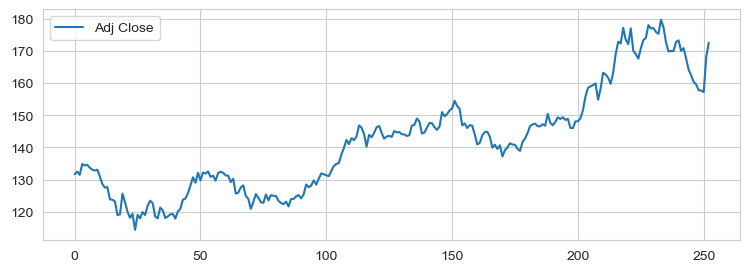

In [16]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(9,3))

Similarily, we can plot change in a stock's volume being traded, over time.

<Axes: >

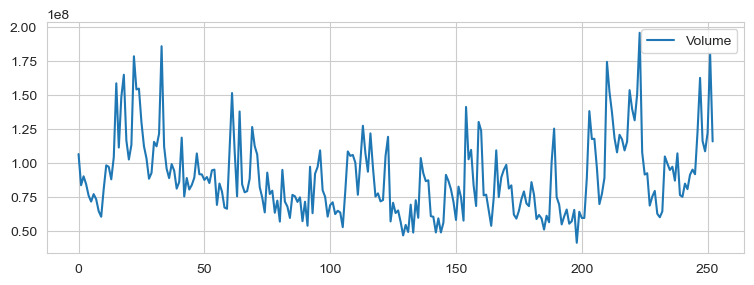

In [18]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(9,3))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [19]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [20]:
AAPL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
248,2022-01-25,158.979996,162.759995,157.020004,159.779999,157.773682,115798400,165.912207,170.217951,166.699984
249,2022-01-26,163.500000,164.389999,157.820007,159.690002,157.684845,108275300,164.392534,169.250258,166.891549
250,2022-01-27,162.449997,163.839996,158.279999,159.220001,157.220734,121954600,162.782015,168.254916,167.073634
251,2022-01-28,165.710007,170.350006,162.800003,170.330002,168.191238,179935700,162.598352,167.866358,167.455380
252,2022-01-31,170.160004,175.000000,169.509995,174.779999,172.585358,115541600,162.767204,167.728610,167.875834


<Axes: >

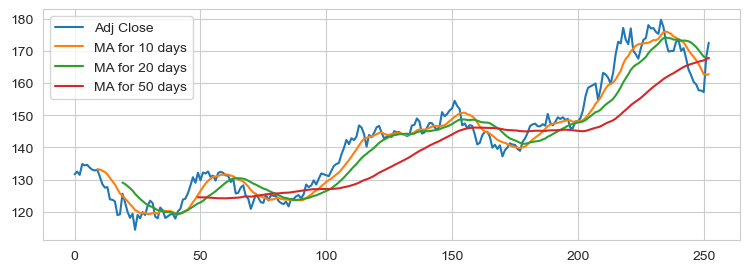

In [21]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(9,3))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

### What was the daily return average of a stock?

In [22]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [25]:
AAPL['Daily Return'].tail()

248   -0.011385
249   -0.000563
250   -0.002943
251    0.069778
252    0.026126
Name: Daily Return, dtype: float64

<Axes: >

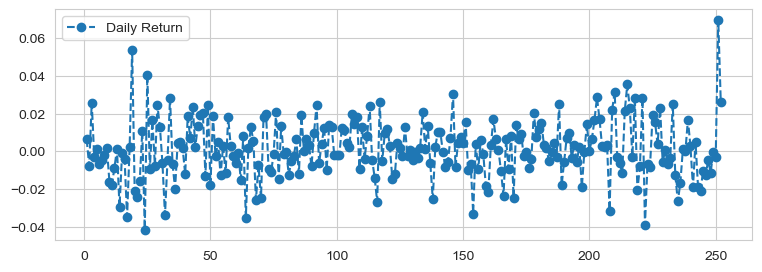

In [27]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(9,3),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

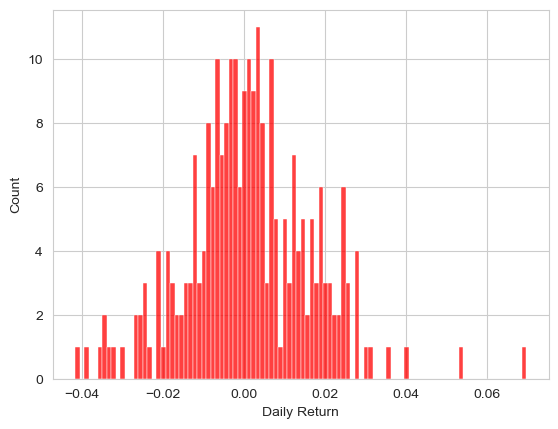

In [33]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [39]:
#Reading just the 'Adj Close' column this time
#close_df = DataReader(tech_list,'file_paths',start,end)['Adj Close']

In [58]:
adj_close_data = {}

# Loop through each file and read just the 'Adj Close' column into a DataFrame
for stock, file_path in zip(tech_list, file_paths):
    df = pd.read_csv(file_path, usecols=['Date', 'Adj Close'])  # Read only 'Date' and 'Adj Close' columns
    adj_close_data[stock] = df.set_index('Date')  # Set 'Date' column as index

# Now you can access each DataFrame containing only the 'Adj Close' data 
# using the stock symbol as the key in the adj_close_data dictionary
# For example, to access the 'Adj Close' data for AAPL:
aapl_adj_close = adj_close_data['AAPL']
googl_adj_close = adj_close_data['GOOGL']
msft_adj_close = adj_close_data['MSFT']
amzn_adj_close = adj_close_data['AMZN']

In [65]:
close_df = pd.concat([aapl_adj_close, googl_adj_close, msft_adj_close, amzn_adj_close], axis=1)

# Rename the columns to indicate the corresponding stock symbols
close_df.columns = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Print the combined DataFrame
print(close_df)

                  AAPL       GOOGL        MSFT        AMZN
Date                                                      
2021-02-01  131.644119   94.653503  232.951492  167.143997
2021-02-02  132.478256   95.956001  232.815414  169.000000
2021-02-03  131.447784  102.944000  236.207870  165.626495
2021-02-04  134.833633  102.681503  235.245529  166.550003
2021-02-05  134.415878  104.441498  235.430237  167.607498
...                ...         ...         ...         ...
2022-01-25  157.773682  126.934998  282.776947  139.985992
2022-01-26  157.684845  129.233002  290.834198  138.872498
2022-01-27  157.220734  129.005005  293.902222  139.637497
2022-01-28  168.191238  133.350998  302.155518  143.977997
2022-01-31  172.585358  135.303497  304.821655  149.573502

[253 rows x 4 columns]


In [66]:
close_df.tail()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-01-25,157.773682,126.934998,282.776947,139.985992
2022-01-26,157.684845,129.233002,290.834198,138.872498
2022-01-27,157.220734,129.005005,293.902222,139.637497
2022-01-28,168.191238,133.350998,302.155518,143.977997
2022-01-31,172.585358,135.303497,304.821655,149.573502


Everything works as expected.

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [67]:
rets_df = close_df.pct_change()

In [68]:
rets_df.tail()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-01-25,-0.011385,-0.029579,-0.026589,-0.031534
2022-01-26,-0.000563,0.018104,0.028493,-0.007954
2022-01-27,-0.002943,-0.001764,0.010549,0.005509
2022-01-28,0.069778,0.033689,0.028082,0.031084
2022-01-31,0.026126,0.014642,0.008824,0.038864


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

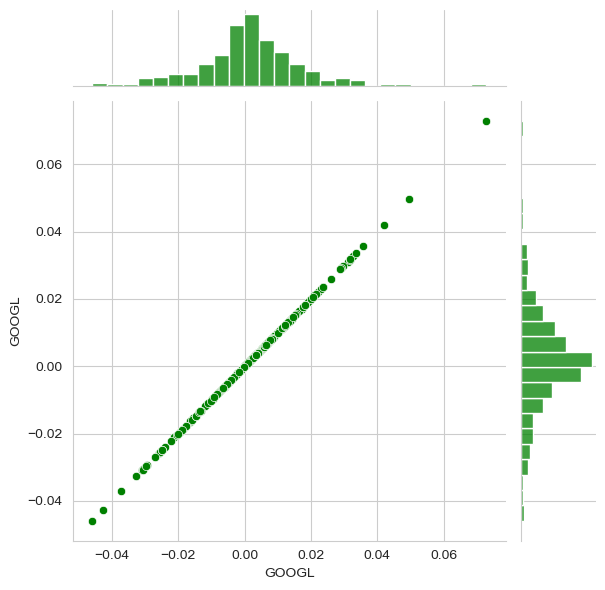

In [75]:
# Assuming 'GOOGL' is a column in the DataFrame rets_df
sns.jointplot(x='GOOGL', y='GOOGL', data=rets_df, kind='scatter', color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

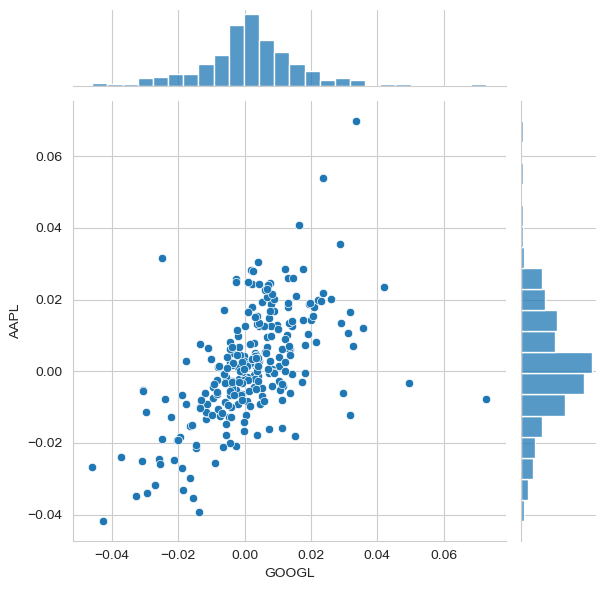

In [77]:
# Assuming 'GOOGL' and 'AAPL' are columns in the DataFrame rets_df
sns.jointplot(x='GOOGL', y='AAPL', data=rets_df, kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


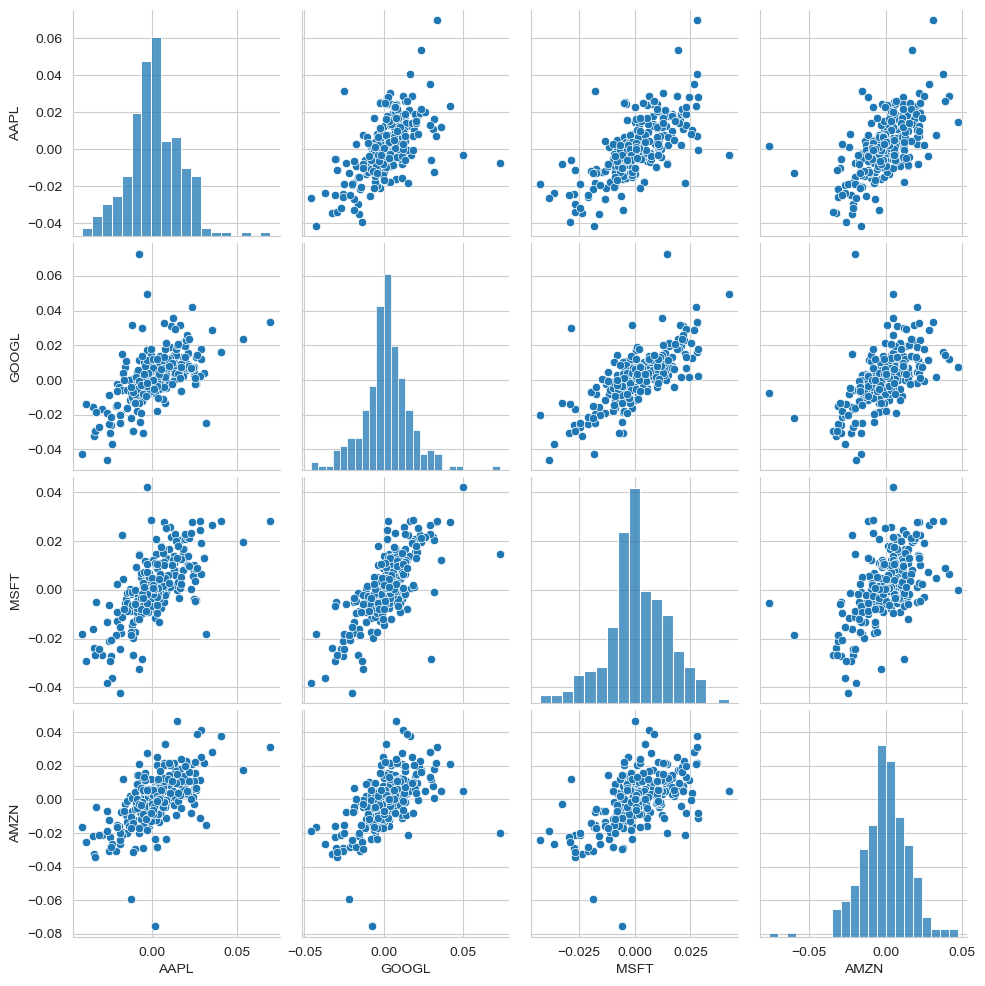

In [78]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

<Axes: ylabel='Date'>

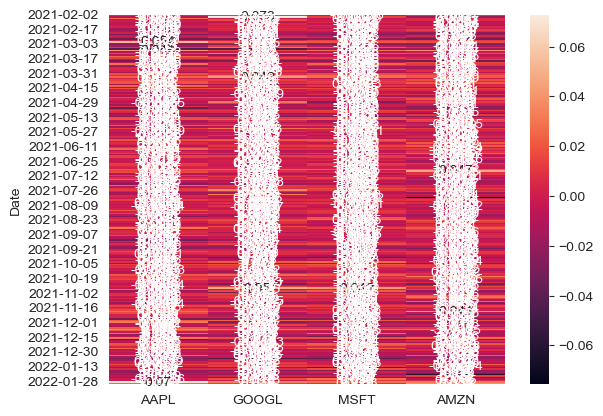

In [79]:
sns.heatmap(rets_df.dropna(),annot=True)


Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [80]:
rets = rets_df.dropna()

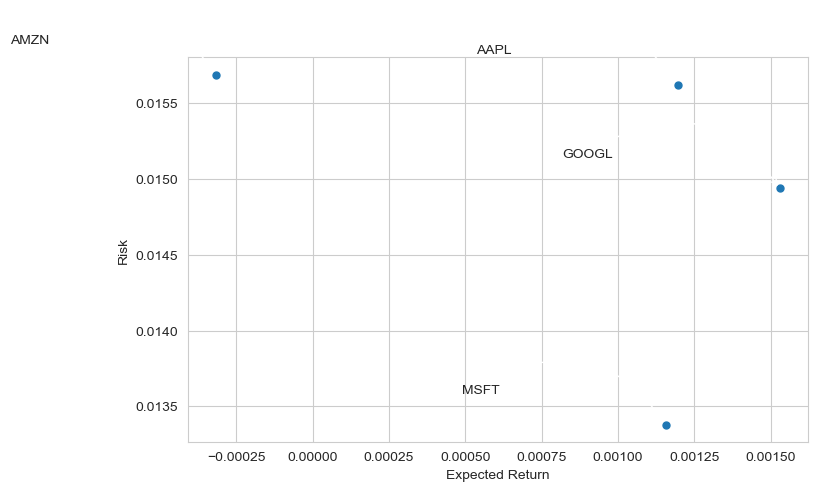

In [81]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    

We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk.

### Value at Risk

We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

#### Bootstrap Method

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

<Axes: xlabel='Daily Return', ylabel='Count'>

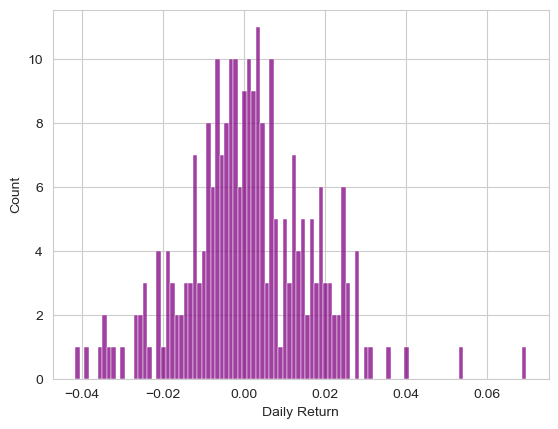

In [102]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Plot histogram of daily returns
sns.histplot(x=AAPL['Daily Return'].dropna(), bins=100, color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [84]:
rets.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-02-02,0.006336,0.013761,-0.000584,0.011104
2021-02-03,-0.007778,0.072825,0.014571,-0.019962
2021-02-04,0.025758,-0.002550,-0.004074,0.005576
2021-02-05,-0.003098,0.017140,0.000785,0.006349
2021-02-08,0.001097,-0.002063,0.001115,-0.008714


In [89]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.024755397863701102

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

### How can we attempt to predict future stock behaviour?

#### Monte Carlo Method

Check out this [link](https://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

In [90]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [91]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [93]:
GOOGL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,92.229500,95.777000,92.229500,94.653503,94.653503,40252000
1,2021-02-02,95.656502,97.468498,95.318497,95.956001,95.956001,66332000
2,2021-02-03,103.280502,105.331001,100.677498,102.944000,102.944000,97882000
3,2021-02-04,103.030998,103.464996,101.754997,102.681503,102.681503,48596000
4,2021-02-05,102.977997,104.796997,102.500000,104.441498,104.441498,29866000


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

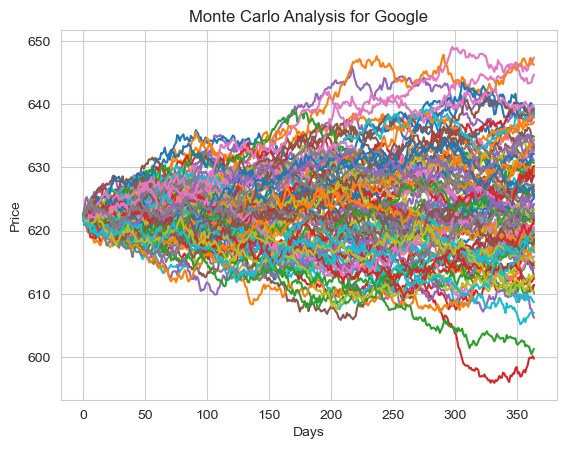

In [94]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [95]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

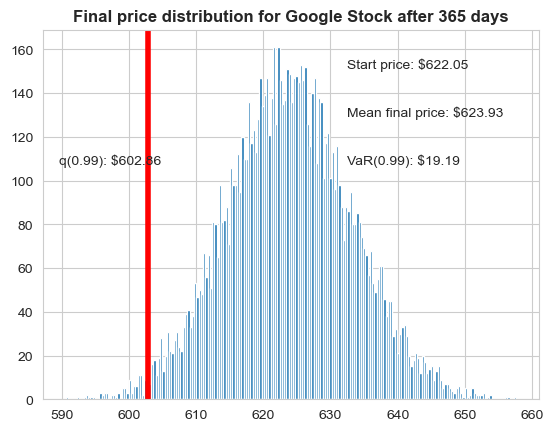

In [96]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05, and the average final price over 10,000 runs was USD623.36.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD18.38, 99% of the time.

In [106]:
import statsmodels.api as sm

# Assuming you have separate DataFrames for AAPL, MSFT, AMZN, and GOOGL
# Define the features (predictors) and the target variable for each stock
X_aapl = AAPL[['Open', 'High', 'Low', 'Volume']]  # Features for AAPL
y_aapl = AAPL['Close']  # Target variable for AAPL

X_msft = MSFT[['Open', 'High', 'Low', 'Volume']]  # Features for MSFT
y_msft = MSFT['Close']  # Target variable for MSFT

X_amzn = AMZN[['Open', 'High', 'Low', 'Volume']]  # Features for AMZN
y_amzn = AMZN['Close']  # Target variable for AMZN

X_googl = GOOGL[['Open', 'High', 'Low', 'Volume']]  # Features for GOOGL
y_googl = GOOGL['Close']  # Target variable for GOOGL

# Fit multiple regression models for each stock
model_aapl = sm.OLS(y_aapl, sm.add_constant(X_aapl)).fit()
model_msft = sm.OLS(y_msft, sm.add_constant(X_msft)).fit()
model_amzn = sm.OLS(y_amzn, sm.add_constant(X_amzn)).fit()
model_googl = sm.OLS(y_googl, sm.add_constant(X_googl)).fit()

# Print summary of the regression models
print("AAPL Regression Summary:")
print(model_aapl.summary())
print("\nMSFT Regression Summary:")
print(model_msft.summary())
print("\nAMZN Regression Summary:")
print(model_amzn.summary())
print("\nGOOGL Regression Summary:")
print(model_googl.summary())


AAPL Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.874e+04
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          2.27e-306
Time:                        22:47:39   Log-Likelihood:                -343.08
No. Observations:                 253   AIC:                             696.2
Df Residuals:                     248   BIC:                             713.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6388      

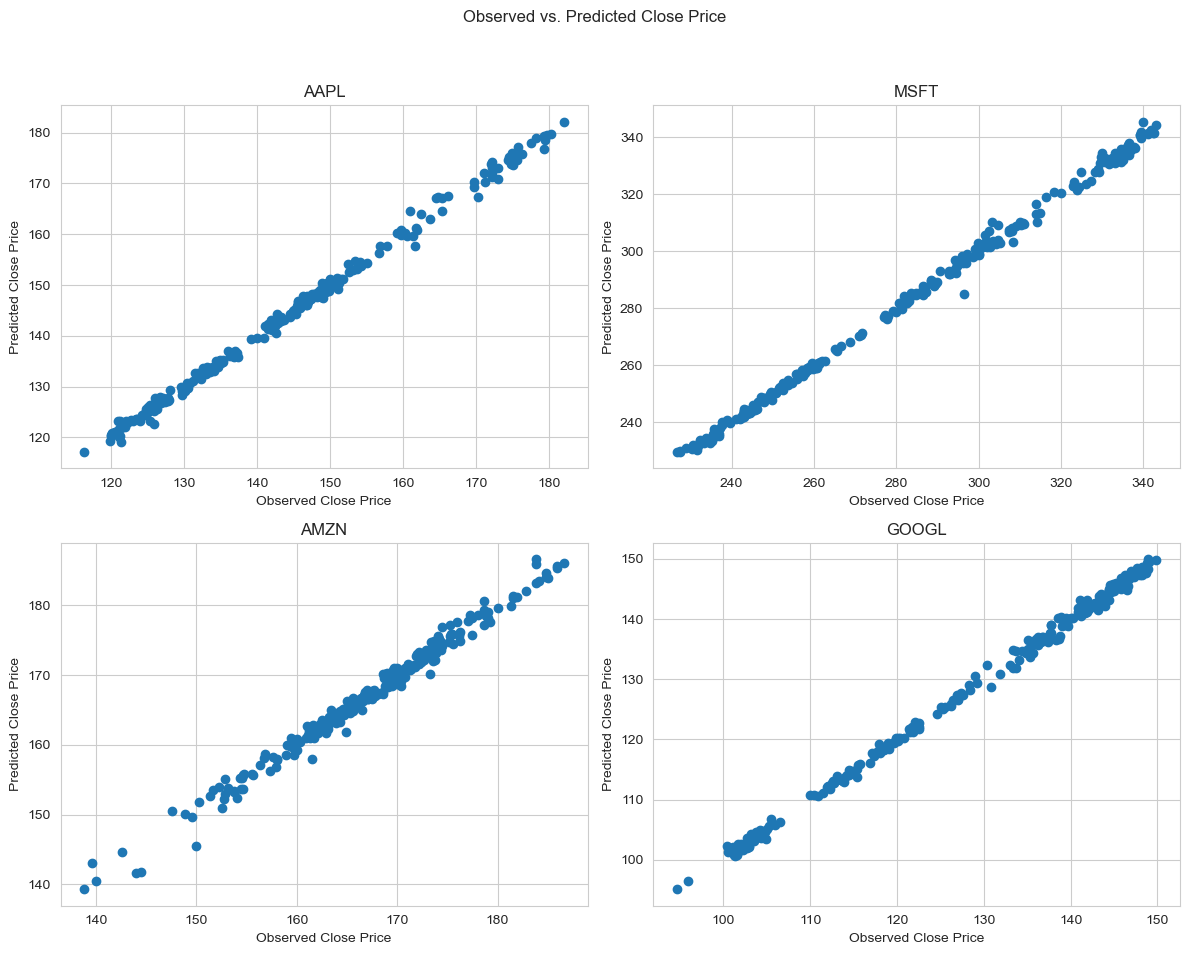

In [107]:
import matplotlib.pyplot as plt

# Create subplots for each stock
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Observed vs. Predicted Close Price')

# Plot for AAPL
axes[0, 0].scatter(y_aapl, model_aapl.predict(sm.add_constant(X_aapl)))
axes[0, 0].set_title('AAPL')
axes[0, 0].set_xlabel('Observed Close Price')
axes[0, 0].set_ylabel('Predicted Close Price')
axes[0, 0].grid(True)

# Plot for MSFT
axes[0, 1].scatter(y_msft, model_msft.predict(sm.add_constant(X_msft)))
axes[0, 1].set_title('MSFT')
axes[0, 1].set_xlabel('Observed Close Price')
axes[0, 1].set_ylabel('Predicted Close Price')
axes[0, 1].grid(True)

# Plot for AMZN
axes[1, 0].scatter(y_amzn, model_amzn.predict(sm.add_constant(X_amzn)))
axes[1, 0].set_title('AMZN')
axes[1, 0].set_xlabel('Observed Close Price')
axes[1, 0].set_ylabel('Predicted Close Price')
axes[1, 0].grid(True)

# Plot for GOOGL
axes[1, 1].scatter(y_googl, model_googl.predict(sm.add_constant(X_googl)))
axes[1, 1].set_title('GOOGL')
axes[1, 1].set_xlabel('Observed Close Price')
axes[1, 1].set_ylabel('Predicted Close Price')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


Trend: The plots generally show a positive linear trend, indicating that the regression models capture relationships well.
    
Scatter Distribution: Points around the diagonal line suggest good fit but some variance in predicted close prices.

Accuracy: Predictions vary across stocks, with some showing closer alignment between observed and predicted close prices.

Outliers: Occasional deviations between observed and predicted close prices may occur due to exceptional market conditions or unaccounted factors.

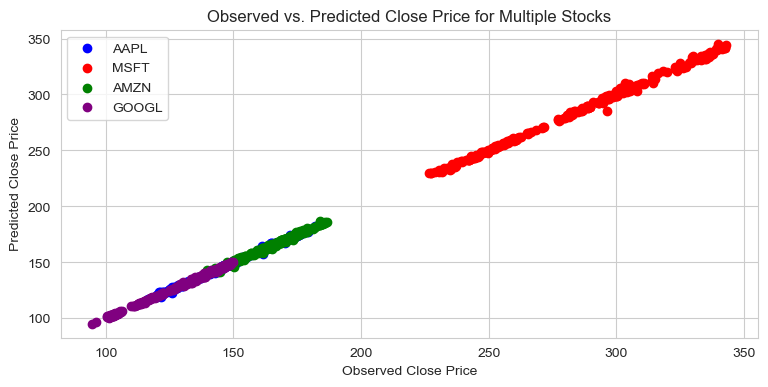

In [109]:
import matplotlib.pyplot as plt

# Plot observed vs. predicted values for all stocks
plt.figure(figsize=(9, 4))
plt.scatter(y_aapl, model_aapl.predict(sm.add_constant(X_aapl)), color='blue', label='AAPL')
plt.scatter(y_msft, model_msft.predict(sm.add_constant(X_msft)), color='red', label='MSFT')
plt.scatter(y_amzn, model_amzn.predict(sm.add_constant(X_amzn)), color='green', label='AMZN')
plt.scatter(y_googl, model_googl.predict(sm.add_constant(X_googl)), color='purple', label='GOOGL')

# Set labels and title
plt.xlabel('Observed Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Observed vs. Predicted Close Price for Multiple Stocks')

# Add legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()


We use plt.scatter() to plot the observed (actual) close prices (y) against the predicted close prices (model.predict(sm.add_constant(X))) for each stock.

The multiple regression analysis shows how open, high, low, and volume relate to the closing prices of AAPL, MSFT, AMZN, and GOOGL stocks. While the models offer predictive potential, accuracy varies with data quality and assumptions. Enhancing predictions may require adding more features and exploring advanced techniques. Overall, multiple regression provides valuable insights for stock price forecasting but needs further refinement for robust results.